# Logistic Regression Coursework
This notebook is supposed to help with your understanding of the code by providing visual insights. It is not graded and solely for that purpose.

In [1]:
# Let's import your code and matplotlib
from logistic_regression_assignment import *
import matplotlib.pyplot as plt


%matplotlib inline
%load_ext autoreload



# Let's load some example data:
x, y, x_test = load_data()
D = x.shape[1]

In [2]:
%autoreload

## Random Prediction
This tests your prediction function.

In [3]:
np.matmul(np.array([1,2,23,3]),np.array([1,2,23,3]))

543

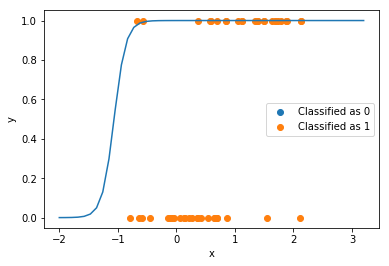

In [4]:
rn.seed(42)
theta = rn.normal(loc=10, size=(D, 1))
y_hat = predict_binary(x, theta).squeeze()
plt.scatter(x[y_hat < 0.5, 1], y[y_hat < 0.5])
plt.scatter(x[y_hat > 0.5, 1], y[y_hat > 0.5])
plt.legend(['Classified as 0', 'Classified as 1'])
plt.plot(x_test[:,1], predict(x_test, theta))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Maximum Likelihood Estimate
This tests your MLE and plots the predictions on the example data.

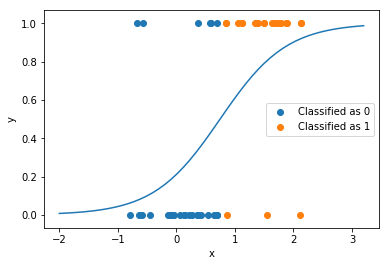

array([-1.31856995,  1.76509268])

In [5]:
theta_ml = max_lik_estimate(x, y)
y_hat = predict_binary(x, theta_ml).squeeze()
plt.scatter(x[y_hat < 0.5, 1], y[y_hat < 0.5])
plt.scatter(x[y_hat > 0.5, 1], y[y_hat > 0.5])
plt.legend(['Classified as 0', 'Classified as 1'])
plt.plot(x_test[:,1], predict(x_test, theta_ml))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta_ml

## Maximum A Posteriori
This tests your MAP solution and plots the predictions on the example data.

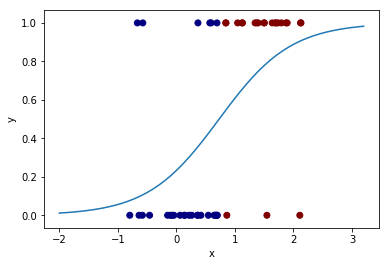

array([-1.19407425,  1.63326662])

In [6]:
m = np.zeros((D, 1))
S = 5 * np.eye(D)

theta_map = map_estimate(x, y, m, S)
y_hat = predict_binary(x, theta_map)
plt.scatter(x[:, 1], y, c=y_hat, cmap='jet')
plt.plot(x_test[:, 1], predict(x_test, theta_map))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta_map

## Laplace Approximation
This tests your Laplace approximation and compares it to the true distribution.

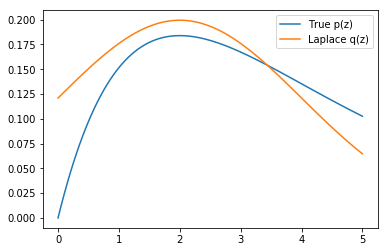

0.36787944117144233

In [7]:
z = np.linspace(0,5,100)
p = stats.chi2.pdf(z, 4)

q = laplace_q(z)
plt.plot(z, p)
plt.plot(z, q)
plt.legend(['True p(z)', 'Laplace q(z)'])
plt.show()
np.exp(-1)

## Laplace Approximation of Logistic Regression
This tests your Laplace approximation of the logistic regression an plots multiple sample regressions.

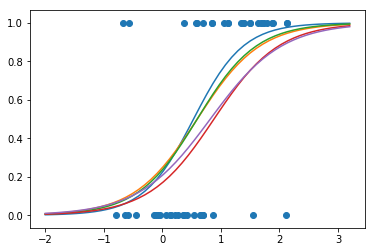

In [9]:
m = np.zeros((D, 1))
S = 5*np.eye(D)
nb_samples = 5

theta_map, S_post = get_posterior(x, y, m, S)
plt.scatter(x[:,1], y)
for i in range(nb_samples):
    th = np.random.multivariate_normal(theta_map.squeeze(), S_post)
    plt.plot(x_test[:,1], predict(x_test, th))
plt.show()


## Metropolis Sampling
This compares your Metropolis sampling to the Laplace posterior.

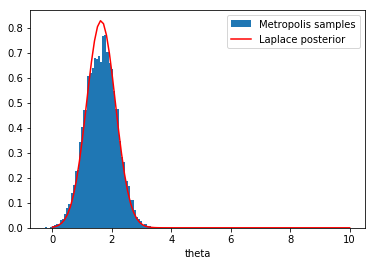

In [14]:
nb_iter = 10000
samples = metropolis_hastings_sample(x, y, m, S, nb_iter)

_,_,h1 = plt.hist(samples[:,1], bins=50, density=True)
h2, = plt.plot(np.linspace(0,10,100),
         stats.multivariate_normal.pdf(np.linspace(0,10,100), theta_map[1], S_post[1,1]), 'r')
plt.legend([h1[0], h2], ['Metropolis samples', 'Laplace posterior'])
plt.xlabel('theta')
plt.show()